In [118]:
#!/usr/bin/python


import pandas as pd
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)






In [119]:
df = pd.DataFrame(data_dict)

In [120]:
df = df.transpose()

In [121]:
df.columns

Index([u'bonus', u'deferral_payments', u'deferred_income', u'director_fees',
       u'email_address', u'exercised_stock_options', u'expenses',
       u'from_messages', u'from_poi_to_this_person',
       u'from_this_person_to_poi', u'loan_advances', u'long_term_incentive',
       u'other', u'poi', u'restricted_stock', u'restricted_stock_deferred',
       u'salary', u'shared_receipt_with_poi', u'to_messages',
       u'total_payments', u'total_stock_value'],
      dtype='object')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
bonus                        146 non-null object
deferral_payments            146 non-null object
deferred_income              146 non-null object
director_fees                146 non-null object
email_address                146 non-null object
exercised_stock_options      146 non-null object
expenses                     146 non-null object
from_messages                146 non-null object
from_poi_to_this_person      146 non-null object
from_this_person_to_poi      146 non-null object
loan_advances                146 non-null object
long_term_incentive          146 non-null object
other                        146 non-null object
poi                          146 non-null object
restricted_stock             146 non-null object
restricted_stock_deferred    146 non-null object
salary                       146 non-null object
shared_receipt_with_poi      146 non-null objec

In [123]:
poi_df = df['poi'].astype(int)


In [124]:
poi_df = pd.DataFrame(poi_df)

In [125]:
poi_df.head()

,poi
ALLEN PHILLIP K,0
BADUM JAMES P,0
BANNANTINE JAMES M,0
BAXTER JOHN C,0
BAY FRANKLIN R,0


In [126]:
df = df.drop('poi', axis = 1)

In [127]:
#remove text feature
email_df = df['email_address'].astype(str)

In [128]:
df = df.drop('email_address', axis = 1)

In [129]:
#df1 = df.where(df == 'NaN', df.median(), axis='columns')
df = df.replace('NaN',0)

In [130]:
df.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,0,1729541,13868,2195,47,65,0,304805,152,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,0,178980,0,0,257817,3486,0,0,0,0,0,0,0,0,0,0,0,182466,257817
BANNANTINE JAMES M,0,0,-5104,0,4046157,56301,29,39,0,0,0,864523,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,0,6680544,11200,0,0,0,0,1586055,2660303,3942714,0,267102,0,0,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,0,0,129142,0,0,0,0,0,69,145796,-82782,239671,0,0,827696,63014


In [131]:
df.apply(pd.to_numeric)

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,0,1729541,13868,2195,47,65,0,304805,152,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,0,178980,0,0,257817,3486,0,0,0,0,0,0,0,0,0,0,0,182466,257817
BANNANTINE JAMES M,0,0,-5104,0,4046157,56301,29,39,0,0,0,864523,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,0,6680544,11200,0,0,0,0,1586055,2660303,3942714,0,267102,0,0,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,0,0,129142,0,0,0,0,0,69,145796,-82782,239671,0,0,827696,63014
BAZELIDES PHILIP J,0,684694,0,0,1599641,0,0,0,0,0,93750,874,0,0,80818,0,0,860136,1599641
BECK SALLY W,700000,0,0,0,0,37172,4343,144,386,0,0,566,126027,0,231330,2639,7315,969068,126027
BELDEN TIMOTHY N,5249999,2144013,-2334434,0,953136,17355,484,228,108,0,0,210698,157569,0,213999,5521,7991,5501630,1110705
BELFER ROBERT,0,-102500,0,3285,3285,0,0,0,0,0,0,0,0,44093,0,0,0,102500,-44093
BERBERIAN DAVID,0,0,0,0,1624396,11892,0,0,0,0,0,0,869220,0,216582,0,0,228474,2493616


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 19 columns):
bonus                        146 non-null int64
deferral_payments            146 non-null int64
deferred_income              146 non-null int64
director_fees                146 non-null int64
exercised_stock_options      146 non-null int64
expenses                     146 non-null int64
from_messages                146 non-null int64
from_poi_to_this_person      146 non-null int64
from_this_person_to_poi      146 non-null int64
loan_advances                146 non-null int64
long_term_incentive          146 non-null int64
other                        146 non-null int64
restricted_stock             146 non-null int64
restricted_stock_deferred    146 non-null int64
salary                       146 non-null int64
shared_receipt_with_poi      146 non-null int64
to_messages                  146 non-null int64
total_payments               146 non-null int64
total_stock_valu

In [133]:
print("Find most important features relative to target")
df.corrwith(poi_df['poi'])

Find most important features relative to target


bonus                        0.023755
deferral_payments           -0.040409
deferred_income             -0.039544
director_fees               -0.061388
exercised_stock_options      0.040315
expenses                    -0.009456
from_messages               -0.032633
from_poi_to_this_person      0.192621
from_this_person_to_poi      0.131008
loan_advances                0.131789
long_term_incentive          0.012886
other                        0.022233
restricted_stock             0.015209
restricted_stock_deferred   -0.005362
salary                      -0.000627
shared_receipt_with_poi      0.243313
to_messages                  0.111262
total_payments               0.049777
total_stock_value            0.034462
dtype: float64

It appears that the following have the highest correlations:
shared_receipt_with_poi      0.243313
from_poi_to_this_person      0.192621
from_this_person_to_poi      0.131008
loan_advances                0.131789
to_messages                  0.111262

Let's evaluate with kbest


In [189]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 
selector = SelectKBest(score_func=f_classif, k=5).fit(df, poi_df)
idxs_selected = selector.get_support(indices=True)
features_dataframe_new = df[idxs_selected]

# Get the raw p-values for each feature, and transform from p-values into scores
scores = selector.scores_

print features_dataframe_new.columns

Index([u'from_poi_to_this_person', u'from_this_person_to_poi',
       u'loan_advances', u'shared_receipt_with_poi', u'to_messages'],
      dtype='object')


Interesting that SelectKBest returned the items with the highest correlation.  I will go with those but I will also conduct a feature union with SelectKBest and PCA to see if there are any clusters that could lead to new features.

In [191]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [212]:
selection = SelectKBest()

In [213]:
pca = PCA()

In [214]:
combined_features = FeatureUnion([("pca", pca), ("univ_select", selection)])

In [215]:
rfc = RandomForestClassifier()

In [216]:
pipeline = Pipeline([("features", combined_features), ("rfc", rfc)])

In [217]:
param_grid = dict(features__pca__n_components=range(1,11),
                  features__univ_select__k=range(1,6),
                  rfc__min_samples_leaf = [25, 50])

In [218]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(df, poi_df, test_size=0.3, random_state=42)

In [219]:
grid_search = GridSearchCV(pipeline, param_grid=param_grid, verbose=10)
grid_search.fit(X_train, y_train['poi'])


Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=1 
[CV]  features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=1, score=0.852941, total=   0.0s
[CV] features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=1 
[CV]  features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=1, score=0.852941, total=   0.0s
[CV] features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=1 
[CV]  features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=1, score=0.852941, total=   0.0s
[CV] features__pca__n_components=1, rfc__min_samples_leaf=50, features__univ_select__k=1 
[CV]  features__pca__n_components=1, rfc__min_samples_leaf=50, features__univ_select__k=1, score=0.852941, total=   0.0s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s



[CV] features__pca__n_components=1, rfc__min_samples_leaf=50, features__univ_select__k=1 
[CV]  features__pca__n_components=1, rfc__min_samples_leaf=50, features__univ_select__k=1, score=0.852941, total=   0.0s
[CV] features__pca__n_components=1, rfc__min_samples_leaf=50, features__univ_select__k=1 
[CV]  features__pca__n_components=1, rfc__min_samples_leaf=50, features__univ_select__k=1, score=0.852941, total=   0.0s
[CV] features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=2 
[CV]  features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=2, score=0.852941, total=   0.0s
[CV] features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=2 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s


[CV]  features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=2, score=0.852941, total=   0.0s
[CV] features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=2 
[CV]  features__pca__n_components=1, rfc__min_samples_leaf=25, features__univ_select__k=2, score=0.852941, total=   0.0s
[CV] features__pca__n_components=1, rfc__min_samples_leaf=50, features__univ_select__k=2 
[CV]  features__pca__n_components=1, rfc__min_samples_leaf=50, features__univ_select__k=2, score=0.852941, total=   0.0s
[CV] features__pca__n_components=1, rfc__min_samples_leaf=50, features__univ_select__k=2 
[CV]  features__pca__n_components=1, rfc__min_samples_leaf=50, features__univ_select__k=2, score=0.852941, total=   0.0s
[CV] features__pca__n_components=1, rfc__min_samples_leaf=50, features__univ_select__k=2 
[CV]  features__pca__n_components=1, rfc__min_samples_leaf=50, features__univ_select__k=2, score=0.852941, total=   0.0s
[CV] features__pca__n_components=1,

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   16.1s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('univ_select', SelectKBest(k=10, score_func=<function f_classif at 0x000000000BAE9D68>))],
       tra...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'features__pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'rfc__min_samples_leaf': [25, 50], 'features__univ_select__k': [1, 2, 3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=10)

In [220]:
print(grid_search.best_estimator_)

Pipeline(steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('univ_select', SelectKBest(k=1, score_func=<function f_classif at 0x000000000BAE9D68>))],
       transfo...imators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False))])


In [221]:
selection_optimized = SelectKBest(k=1)
pca = PCA(n_components=1)

In [ ]:
X_features = combined_features.fit(df, poi_df).transform(df)

In [ ]:
pipeline_optimized = Pipeline([('vect', CountVectorizer(ngram_range = (1, 2), stop_words = 'english')),
                               ('tfidf', TfidfTransformer(use_idf = True)), 
                               ('clf', RandomForestClassifier())])

In [172]:
from sklearn import preprocessing
scaler = preprocessing.MaxAbsScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [137]:
from sklearn import linear_model
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score
reg = linear_model.Lasso()

reg.fit(features_train, labels_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [141]:
features_train_pred = reg.predict(features_train)
features_test_pred  = reg.predict(features_test)
print "accuracy score train:", 
print "r2 score train:", reg.score(features_train, labels_train)

print "accuracy score test:",
print "r2 score test:", reg.score(features_test, labels_test)


accuracy score train: r2 score train: 0.375473364369
accuracy score test: r2 score test: -9.90441543995


In [61]:
#Scale features prior to PCA and feature selection
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [142]:
print "slope:", reg.coef_
print "intercept:", reg.intercept_

#overfitting = lower score on test data!

slope: [ -2.40984676e-08  -1.79920293e-07  -2.39617230e-07  -1.25467522e-06
   1.11393147e-08   5.64803602e-07  -0.00000000e+00   0.00000000e+00
  -0.00000000e+00  -6.17351066e-09  -3.26978872e-08  -2.55201310e-08
  -9.09232056e-09   3.24256139e-07  -7.15764672e-08   1.92004612e-04
  -6.86345658e-05   1.32361577e-08   2.99497815e-09]
intercept: [ 0.08957137]


bonus                       -2.409847e-08
deferral_payments           -1.799203e-07
deferred_income             -2.396172e-07
director_fees               -1.254675e-06
exercised_stock_options      1.113931e-08
expenses                     5.648036e-07
from_messages               -0.000000e+00
from_poi_to_this_person      0.000000e+00
from_this_person_to_poi     -0.000000e+00
loan_advances               -6.173511e-09
long_term_incentive         -3.269789e-08
other                       -2.552013e-08
restricted_stock            -9.092321e-09
restricted_stock_deferred    3.242561e-07
salary                      -7.157647e-08
shared_receipt_with_poi      1.920046e-04
to_messages                 -6.863457e-05
total_payments               1.323616e-08
total_stock_value            2.994978e-09
dtype: float64


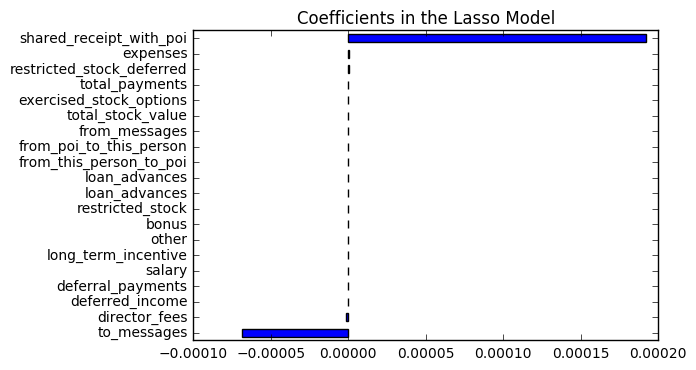

In [159]:
import matplotlib.pyplot as plt
coefs = pd.Series(reg.coef_, index = features_train.columns)
keeper = str(sum(coefs != 0))
print coefs

imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

There are two big univariate feature selection tools in sklearn: SelectPercentile and SelectKBest. The difference is pretty apparent by the names: SelectPercentile selects the X% of features that are most powerful (where X is a parameter) and SelectKBest selects the K features that are most powerful (where K is a parameter).

In [ ]:
### Task 2: Remove outliers
### Task 3: Create new feature(s)
### Store to my_dataset for easy export below.
my_dataset = data_dict

In [ ]:
### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.htmldation.StratifiedShuffleSplit.html

In [ ]:


# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)

### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)